# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [3]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager



Paso 2: Descargar HTML

In [4]:

URL = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"

response = requests.get(URL)


Paso 3: Transforma el HTML

In [5]:
if response.status_code == 200:
  # print(response.text)
  html_parseado = BeautifulSoup(response.text, "html.parser")

html_io = io.StringIO(response.text)
df_list = pd.read_html(html_io)
print(df_list[0])
print(len(df_list))


                   Rank                    Song  \
0                     1       "Blinding Lights"   
1                     2          "Shape of You"   
2                     3               "Starboy"   
3                     4     "Someone You Loved"   
4                     5             "As It Was"   
..                  ...                     ...   
96                   97      "Someone Like You"   
97                   98  "Too Good At Goodbyes"   
98                   99          "Stay with Me"   
99                  100                "Havana"   
100  As of 26 June 2025      As of 26 June 2025   

                         Artist(s)  Streams (billions)        Release date  \
0                       The Weeknd               4.898    29 November 2019   
1                       Ed Sheeran               4.423      6 January 2017   
2         The Weeknd and Daft Punk               3.957   21 September 2016   
3                    Lewis Capaldi               3.948     8 November 2018 

Paso 4: Procesa el DataFrame

In [6]:
#eliminar_b = df_list[0].replace("B", " ",regex= True)
#print(eliminar_b)

Paso 5: Almacena los datos en sqlite.


In [7]:
con = sqlite3.connect("spotify.db")

Crea una instancia vacía de la base de datos e incluye en ella los datos limpios, como vimos en el módulo de bases de datos. Una vez tengas una base de datos vacía:

Crea la tabla.
Inserta los valores.
Almacena (commit) los cambios.

In [8]:
#con = sqlite3.connect("spotify.db")
#eliminar_b.to_sql('spotify', con, if_exists='replace')

In [9]:
#cursor = con.execute("SELECT * from spotify")
#for row in cursor: # Iterar a través de todas las filas del filtro resultante
    #print(f"Id = {row[0]} Rank = {row[1]} Song = {row[2]} Artist(s) = {row[3]} Streams (billions) = {row[4]} Release date = {row[5]}")

Visualización de datos pura, sin Matplotlib o Seaborn

In [10]:
#Primeros 10 del ranking

#print("Id | Rank | Song | Artist(s) | Streams (billions) | Release date")

#cursor.execute("SELECT * FROM spotify WHERE CAST(rank AS INTEGER) <= 10")
#rows = cursor.fetchall()
#for row in rows: # Iterate through all the rows of the resulting filter
    #print(f"{row[0]} | {row[1]} | {row[2]} | {row[3]} | {row[4]} | {row[5]}")


Paso 6: Visualiza los datos 

¿Qué tipos de visualizaciones podemos realizar? Propón al menos 3 y muéstralos.

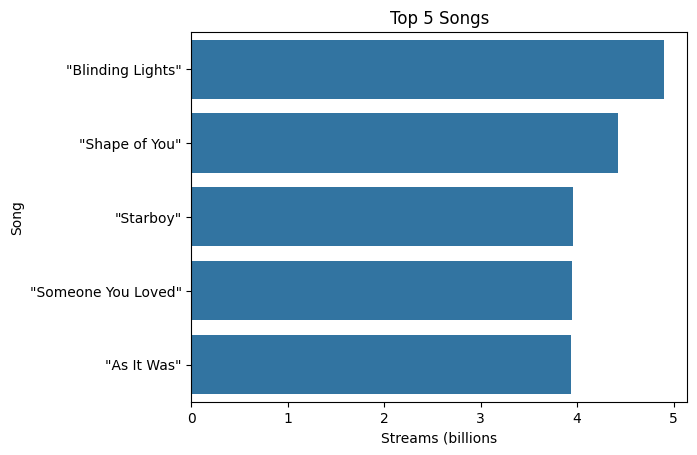

In [32]:
df_list[0]["Streams (billions)"] = pd.to_numeric(df_list[0]["Streams (billions)"], errors="coerce")

top5 = df_list[0].nlargest(5, "Streams (billions)")
sns.barplot(x="Streams (billions)", y="Song", data=top5)
plt.title("Top 5 Songs")
plt.xlabel("Streams (billions")
plt.ylabel("Song")
plt.show()

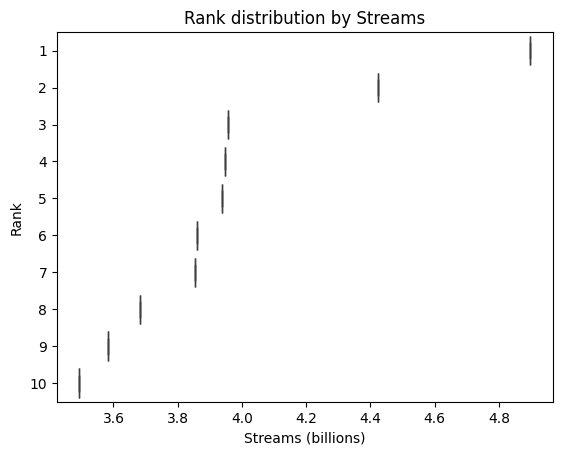

In [35]:
df_list[0]["Streams (billions)"] = pd.to_numeric(df_list[0]["Streams (billions)"], errors="coerce")

top10 = df_list[0].nlargest(10, "Streams (billions)")
sns.boxplot(x="Streams (billions)", y="Rank", data=top10)
plt.title("Rank distribution by Streams")
plt.show()